# Stellar Formation and Circumstellar Medium - Practical Work

## The accretion disk evolution and the Spectral Energy Distribution (SED)
The evolution of a viscous accretion disk depends upon the behaviour of the viscosity $\nu$, which in turn can depend in an unknown way on the disk properties. However it is possible to explore some simple solutions of the diffusion equation which show some general properties of accretion disks

$$ \frac{\partial \Sigma}{\partial t} = \frac{3}{r} \frac{\partial}{\partial r} \left[ r^{1/2} \frac{\partial}{\partial r} (\nu \Sigma r^{1/2}) \right] $$

## Part I

1. Examine the case where the viscosity is constant. Consider an initial thin annulus of material at a distance $r_0$ to the star. Starting with an initial density distribution representing the annulus of matter,

$$ \Sigma (r, t= 0) = \frac{M_d}{2\pi r_0} \delta (r-r_0) $$

Lynden-Bell & Pringle (1974) showed that for a constant viscosity $\nu_0$ the solution is

$$ \Sigma(x,\tau) = \frac{M_d}{\pi r_0^2} x^{-1/4} \tau^{-1} \mathrm{exp} \left[-\frac{(1+x^2)}{\tau}\right] I_{1/4} \left(\frac{2x}{\tau}\right) $$

where $I_{1/4}$ is the modified Bessel function of fractional order, $x=r/r_0$ is the dimensionless distance and $\tau=12 \nu t /r_0^2$ a dimensionless time.

As initial conditions take mass of disk $M_d = 0.01 M_\odot$, $\nu_0 = 10^{17}$ cm$^2$ s$^{-1}$, $R_\star = 2 R_\odot$, $M_\star = 1 M_\odot$, the inner part of the disk $r_\mathrm{in} = R_\star$, the outer part of the disk $r_\mathrm{out} = 200 R_\star$ and take $r_0 = r_\mathrm{out}/2$. $M_\odot = 1.99 \times 10^{33}$ g, $R_\odot = 6.96 \times 10^{10}$ cm


In [1]:
#import modules
import numpy as np, scipy, matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.visualization import simple_norm
from astropy.visualization import ZScaleInterval
from scipy.stats import norm
from scipy.integrate import simps
from IPython.display import IFrame
from scipy.optimize import curve_fit

In [2]:
#declaring solar constants
M_solar = 1.99 * 10**(33)  #g
R_solar = 6.96 * 10**(10) #cm

#initial conditions of the disk
M_d = 0.01 * M_solar #g
nu_0 = 10**(17) #cm^2 s^-1
R_star = 2 * R_solar #cm
M_star = 1 * M_solar #g
r_in = R_star #cm
r_out = 200 * R_star #cm
r_0 = r_out / 2 #cm

(a) Plot the solution at various times and show that the initial ring of material spreads and as the time proceeds there is a concentration of mass at smaller radii, while some mass are pushed to large distance to conserve angular momentum.

In [3]:
def initial_sigma(sigma, K):
    sigma[0,K:K+1] = M_d / (2 * np.pi * r_0) * 1
    sigma[0,:K] = 0
    sigma[0,K+1:] = 0
    return sigma

In [4]:
def density_dist_analytical(Sigma_array, r_array, t_array, nu):
    for j,t in enumerate(t_array):
        tau = 12 * nu * t / r_0**2
        tau_array[j] = tau
        if j == 0:
            Sigma_array = initial_sigma(Sigma_array, int(Nr/2))
        else:
            for n,r in enumerate(r_array):
                x = r / r_0
                bessel_func = scipy.special.iv(1/4, 2*x/tau)
                Sigma = M_d / (np.pi * r_0**2) * x**(-1/4) * tau**(-1) * np.exp(-(1+x**2)/tau) * bessel_func
                Sigma_array[n, j] = Sigma
    return Sigma_array, tau_array

In [5]:
Nr = 1000; Nt = 850
dr = r_in
dt = 10**5 #yr?
K = int(Nr/2)

r_array = np.linspace(r_in, r_out, Nr+1) # mesh points in space
t_array = np.linspace(0, Nt*dt, Nt+1) # mesh points in time
Sigma_array = np.zeros((Nr+1, Nt+1))
nu = nu_0 #viscosity is constant

tau_array = np.zeros(Nt+1)

In [6]:
Sigma_array, tau_array = density_dist_analytical(Sigma_array, r_array, t_array, nu)

C:\Users\telmo\AppData\Local\Temp\ipykernel_1940\811193343.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  Sigma = M_d / (np.pi * r_0**2) * x**(-1/4) * tau**(-1) * np.exp(-(1+x**2)/tau) * bessel_func


In [7]:
def plot_1D_sigma(r_array, tau_array, Sigma_array, zoom):
    
    fig, ax = plt.subplots(figsize=(6,4.5))
    if zoom == True:
        fig1, ax1 = plt.subplots(figsize=(6,4.5))
    
    tau_indices = [7, 14, 50, 206, -350, -1]
    
    for i, (tau_idx, t) in enumerate(zip(tau_indices, tau_array[tau_indices])):
        tau_plot = tau_array[tau_idx]
        
        # Select the appropriate column of Sigma_array for the current time step
        sig = Sigma_array[:, tau_idx]*np.pi*r_0**2/M_d
        
        ax.plot(r_array/r_0, sig, label=round(tau_plot, 3))
    
        if zoom == True:
            ax1.plot(r_array[-70:]/r_0, sig[-70:], label=round(tau_plot, 3))
            ax1.set_xlabel(r"$x = R/R_0$",fontsize=13); ax1.set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=13)
            ax1.set_title("Zoom at outer border",fontsize=13)
            ax1.legend(title=r"$\tau$", fontsize='small', loc="best")

    ax.set_xlabel(r"$x = R/R_0$",fontsize=13)
    ax.set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=13)
    #ax.set_title("Density Distribution of the disk annulus")
    ax.legend(title=r"$\tau$", fontsize='small', loc="best")

    fig.tight_layout()
    fig.savefig("part1_a_1.pdf")
    print("Plot saved as part1_a_1.pdf")
    
    fig1.tight_layout()
    fig1.savefig("part1_a_1_zoom.pdf")
    print("Plot saved as part1_a_1_zoom.pdf")

Plot saved as part1_a_1.pdf
Plot saved as part1_a_1_zoom.pdf


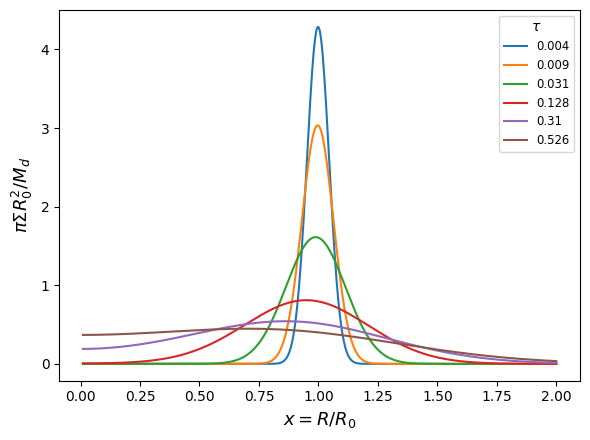

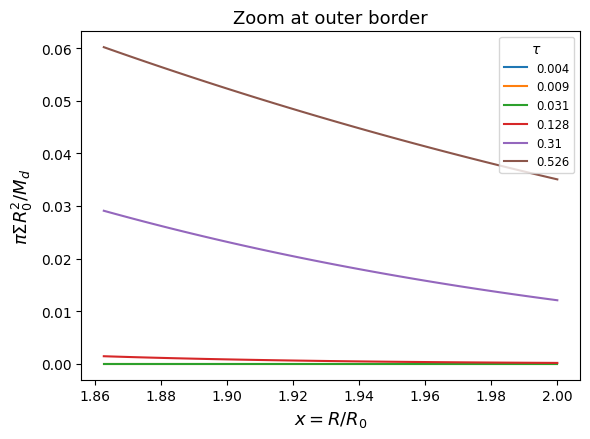

In [8]:
plot_1D_sigma(r_array, tau_array, Sigma_array, zoom=True)

In [9]:
def plot_2D_sigma(Sigma_array,i,title,norm_bool):
    plt.figure(i)
    if norm_bool == True:
        zscale = ZScaleInterval()
        zlims = zscale.get_limits(Sigma_array)
        norm = simple_norm(Sigma_array, min_cut=zlims[0], max_cut=zlims[1])
    else: norm = None

    plt.imshow(Sigma_array, extent=[r_in/r_0, r_out/r_0, 0, tau_array[-1]], aspect='auto', cmap='hot', origin='lower', norm=norm)
    plt.colorbar(label=r"$\pi \Sigma R_0^2/M_d$")
    #plt.title(f'{title} Solution of Diffusion Equation')
    plt.xlabel(r"$x = R/R_0$")
    plt.ylabel(r'$\tau$')

    plt.tight_layout()
    plt.savefig("part1_a_2.pdf")
    print("Plot saved as part1_a_2.pdf")

Plot saved as part1_a_2.pdf


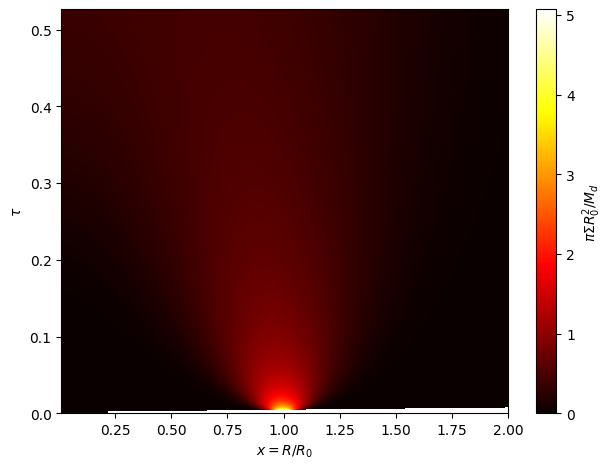

In [10]:
plot_2D_sigma(np.transpose(Sigma_array)*np.pi*r_0**2/M_d,i=1,title="Analytical",norm_bool=False)

(b) Show how the diffusion evolution time scale changes with increasing the viscosity.

Testing three different values of viscosity and plotting in the same time scale positions.

C:\Users\telmo\AppData\Local\Temp\ipykernel_1940\811193343.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  Sigma = M_d / (np.pi * r_0**2) * x**(-1/4) * tau**(-1) * np.exp(-(1+x**2)/tau) * bessel_func


Plot saved as part1_b.pdf


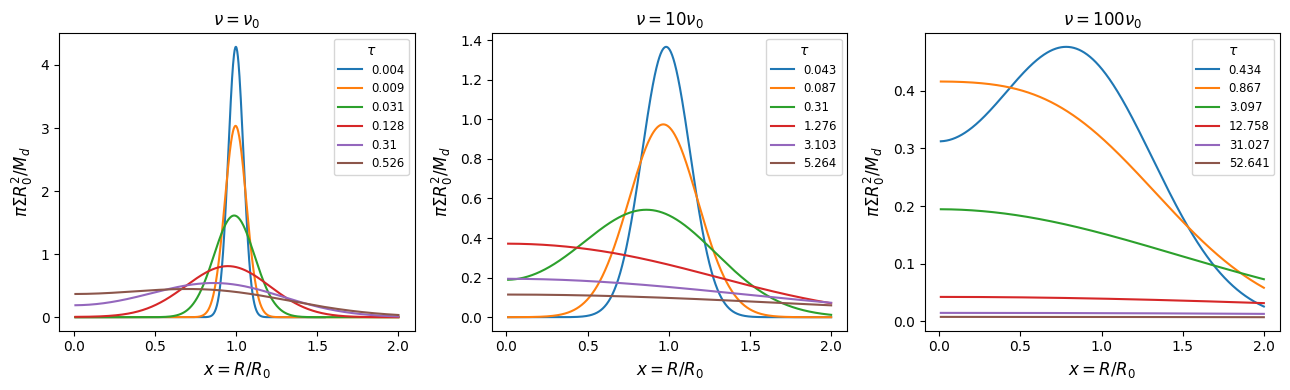

In [11]:
nu_list = [nu_0, 10*nu_0, 100*nu_0]
nu_list_label= ["","10","100"]

fig, ax = plt.subplots(1,3,figsize=(13,4))

for n,nu in enumerate(nu_list):
    Sigma_array = np.zeros((Nr+1, Nt+1))
    tau_array = np.zeros((Nt+1))
    
    Sigma_array, tau_array = density_dist_analytical(Sigma_array, r_array, t_array, nu)

    tau_indices = [7, 14, 50, 206, -350, -1]
    for i, (tau_idx, t) in enumerate(zip(tau_indices, tau_array[tau_indices])):
        tau_plot = tau_array[tau_idx]
        sig = Sigma_array[:, tau_idx]*np.pi*r_0**2/M_d
        ax[n].plot(r_array/r_0, sig, label=round(tau_plot, 3))
        ax[n].set_xlabel(r"$x = R/R_0$",fontsize=12)
        ax[n].set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=12)
        ax[n].legend(title=r"$\tau$", fontsize='small', loc="best")
        ax[n].set_title(rf"$\nu = {nu_list_label[n]} \nu_0$")

fig.tight_layout()
fig.savefig("part1_b.pdf")
print("Plot saved as part1_b.pdf")

Surface mass density at border of disk in function of dimensionless time $\tau$ for those three values of viscosity.

C:\Users\telmo\AppData\Local\Temp\ipykernel_40360\811193343.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  Sigma = M_d / (np.pi * r_0**2) * x**(-1/4) * tau**(-1) * np.exp(-(1+x**2)/tau) * bessel_func


Plot saved as part1_extra.pdf


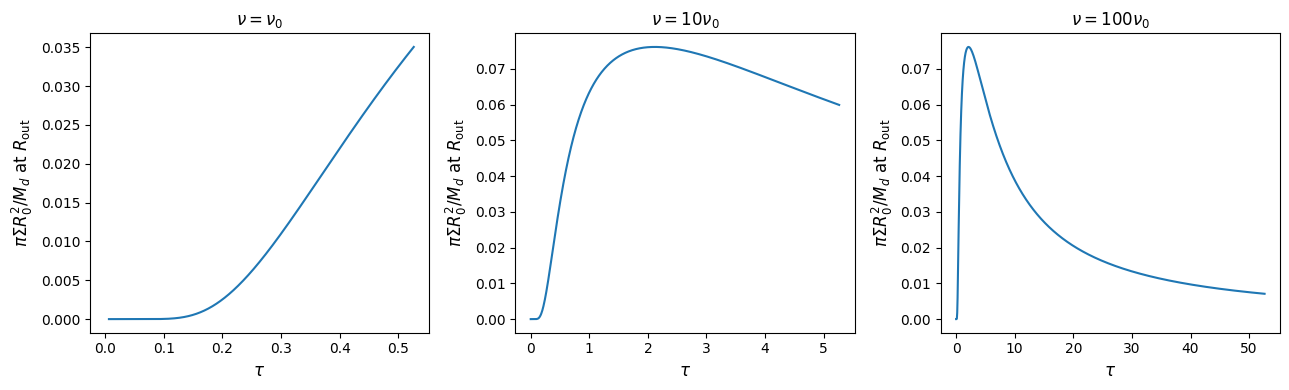

In [104]:
nu_list = [nu_0, 10*nu_0, 100*nu_0]
nu_list_label= ["","10","100"]

fig, ax = plt.subplots(1,3,figsize=(13,4))

for n,nu in enumerate(nu_list):
    Sigma_array = np.zeros((Nr+1, Nt+1))
    tau_array = np.zeros((Nt+1))
    
    Sigma_array, tau_array = density_dist_analytical(Sigma_array, r_array, t_array, nu)
    last_sigma = Sigma_array[-1, :] * np.pi * r_0**2 / M_d
    
    ax[n].plot(tau_array, last_sigma)
    ax[n].set_xlabel(r"$\tau$", fontsize=12)
    ax[n].set_ylabel(r"$\pi \Sigma R_0^2/M_d$ at $R_\text{out}$", fontsize=12)
    ax[n].set_title(rf"$\nu = {nu_list_label[n]} \nu_0$")
    
fig.tight_layout()
fig.savefig("part1_extra.pdf")
print("Plot saved as part1_extra.pdf")

Summing the surface mass density values and plotting them against the viscosity.

C:\Users\telmo\AppData\Local\Temp\ipykernel_1940\811193343.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  Sigma = M_d / (np.pi * r_0**2) * x**(-1/4) * tau**(-1) * np.exp(-(1+x**2)/tau) * bessel_func


Plot saved as part1_extra1.pdf


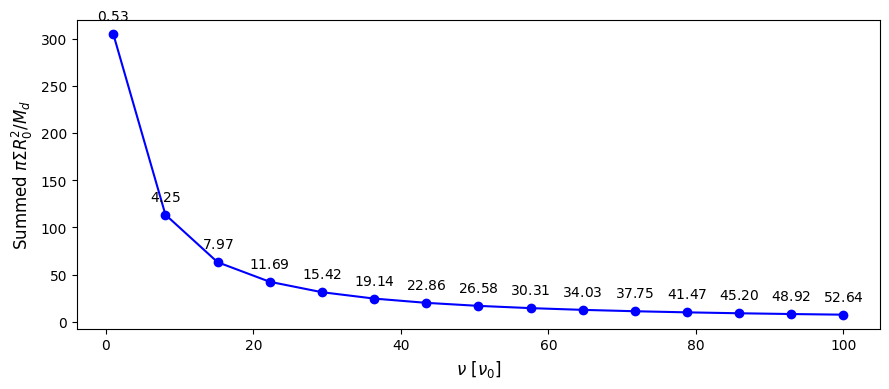

In [26]:
nu_list = np.linspace(nu_0,100*nu_0,15)
nu_number = np.linspace(1,100,15)

total_sigma_values = []  # List to store total sigma values
tau_labels = []  # List to store labels for tau

fig, ax = plt.subplots(figsize=(9, 4))

for n, nu in enumerate(nu_list):
    Sigma_array = np.zeros((Nr+1, Nt+1))
    tau_array = np.zeros((Nt+1))
    
    Sigma_array, tau_array = density_dist_analytical(Sigma_array, r_array, t_array, nu)
    Sigma_array = Sigma_array*np.pi*r_0**2 / M_d
    
    tau_last = tau_array[-1]  # Last tau value
    tau_labels.append(f"${tau_last:.2f}$")  # Append last tau value to the labels list
    
    # Calculate maximum sigma value for this nu
    total_sigma = np.sum(Sigma_array[:,-1])

    total_sigma_values.append(total_sigma)  # Append maximum sigma value to the list
    
# Plotting the total sigma values against nu
ax.plot(nu_number, total_sigma_values, marker='o', linestyle='-', color='b')
ax.set_xlabel(r"$\nu$ [$\nu_0$]", fontsize=12)
ax.set_ylabel(r"Summed $\pi \Sigma R_0^2/M_d$", fontsize=12)

# Adding labels for nu based on the last tau
for i, txt in enumerate(tau_labels):
    ax.annotate(txt, (nu_number[i], total_sigma_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

fig.tight_layout()
fig.savefig("part1_extra1.pdf")
print("Plot saved as part1_extra1.pdf")

2. Integrate numerically the diffusion equation, starting with the initial density distribution as before

(a) Take the viscosity constant in the disk. Compare the results with the analytical solution.
    [ Note: The integration of a diffusion equation

$$ \frac{\partial U}{\partial t} = D \frac{\partial^2 U}{\partial x^2} $$

with $U = U(t,x) = U(t_n,x_j) = U_j^n$ can be solved in first approximation as

$$ \frac{U_j^{n+1} - U_j^n}{\Delta t} = D \left[ \frac{U_{j+1}^n - 2 U_j^n + U^n_{j-1}}{\Delta x^2} \right]$$

and the stability criterion $\frac{2 D \Delta t}{\Delta x^2} \leq 1$. ]

In [27]:
# Numerical parameters
Nr = 200; Nt = 8300
dt = 10**4 
dr = R_star

K = int(Nr/2)
r_out = Nr*dr
r_0 = K*dr #r_out / 2

r_array = np.linspace(dr, r_out, Nr+1) # mesh points in space
t_array = np.linspace(0, Nt*dt, Nt+1) # mesh points in time
tau_array = 12*nu_0 * t_array / r_0**2

Sigma_zeroes = np.zeros((Nt+1, Nr+1))

# Diffusion coefficient
D = 3 * nu_0
stability_criterion = 2 * D * dt / dr**2
print("Stability criterion has to be lower than 1:", stability_criterion)

Stability criterion has to be lower than 1: 0.3096512088783195


Two types of initial condition: a Gaussian which width can be changed or a kind of Delta Dirac Function peak. The one used was the second.

In [28]:
def initial_condition_gaussian(sigma,r,r_0):
    sig = r_0/20
    result = M_d / (2 * np.pi * r_0) * np.exp(-(r-r_0)**2/(2*sig**2)) #gaussian approximation
    sigma[0,:] = result
    return sigma

In [29]:
def initial_condition_dirac(sigma,K,r_0):
    sigma[0,K:K+1] = M_d / (2 * np.pi * r_0) * 1
    sigma[0,:K] = 0
    sigma[0,K+1:]=0
    return sigma

In [30]:
def density_dist_numerical(sigma, r_array, dt, dr, nu, r_0, initial_cond="delta_dirac"):
    # Numerical solution using the explicit finite-difference method
    # Set initial condition sigma(r,0) = I(r)
    if initial_cond == "delta_dirac": #Delta Dirac function at r_0, the supposed. visualization is not great especially to 2D plot
        sigma = initial_condition_dirac(sigma,K,r_0)
    elif initial_cond == "gaussian": #approximates the initial distribution to a Gaussian (results have better visualization)
        sigma = initial_condition_gaussian(sigma,r_array,r_0)
        
    for n in range(0, Nt):
        for j in range(1, Nr):
            sigma[n+1, j] = sigma[n,j] + 3*nu*dt/(j*dr**2) * (3/2 * (sigma[n, j+1] - sigma[n,j]) + j * (sigma[n,j+1]-2*sigma[n,j]+sigma[n,j-1]))
        #boundary conditions
        sigma[:, 0] = 0
        sigma[:, -1] = 0   
        
    return sigma

In [31]:
Sigma_array = density_dist_numerical(Sigma_zeroes, r_array, dt, dr, nu_0, r_0, initial_cond="delta_dirac")

In [32]:
def plot_2D_sigma(Sigma_array,i,norm_bool):
    plt.figure(i)
    if norm_bool == True:
        zscale = ZScaleInterval()
        zlims = zscale.get_limits(Sigma_array)
        norm = simple_norm(Sigma_array, min_cut=zlims[0], max_cut=zlims[1])
        label_color = r"Z-scaled $\pi \Sigma R_0^2/M_d$"
    else: norm = None; label_color = r"$\pi \Sigma R_0^2/M_d$"

    plt.imshow(Sigma_array, extent=[r_in/r_0, r_out/r_0, 0, tau_array[-1]], aspect='auto', cmap='hot', origin='lower', norm=norm)
    plt.colorbar(label=label_color)
    plt.xlabel(r"$x = R/R_0$")
    plt.ylabel(r'$\tau$')

    plt.tight_layout()

Plot saved as part1_2a_2d.pdf


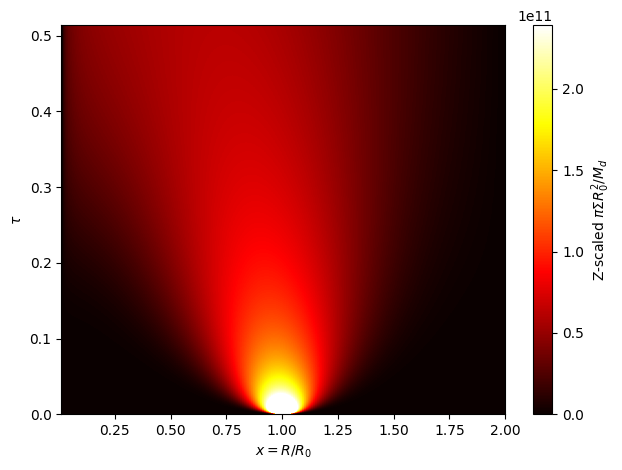

In [33]:
plot_2D_sigma(Sigma_array*np.pi*r_0**2/M_d,i=1,norm_bool=True)
plt.savefig("part1_2a_2d.pdf")
print("Plot saved as part1_2a_2d.pdf")

In [34]:
def plot_1D_sigma(r_array, tau_array, Sigma_array, zoom):
    
    tau_indices = [30, 140, 520, 2070, -4500, -1]
    
    for i, (tau_idx, t) in enumerate(zip(tau_indices, tau_array[tau_indices])):
        tau_plot = tau_array[tau_idx]
        sig = Sigma_array[tau_idx, :]
        ax.plot(r_array/r_0, sig, label=round(tau_plot, 3))

    ax.set_xlabel(r"$x = R/R_0$",fontsize=13)
    ax.set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=13)
    ax.legend(title=r"$\tau$", fontsize='small', loc="best")

Plot saved as part1_2a.pdf


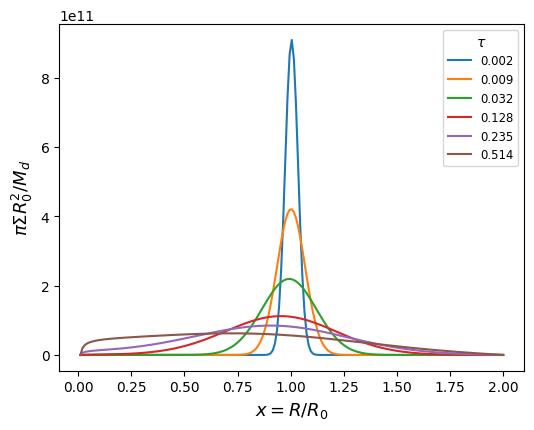

In [35]:
fig, ax = plt.subplots(figsize=(6,4.5))
plot_1D_sigma(r_array, tau_array, Sigma_array*np.pi*r_0**2/M_d, zoom=False)
fig.savefig("part1_2a.pdf")
print("Plot saved as part1_2a.pdf")

(b) Take a dependence of the viscosity with distance to the star, $\nu = \nu_0 \left(\frac{r}{r_0}\right)^\beta$. Analyse the
results by changing the parameter $\beta$, the viscosity $\nu_0$ and the initial distance between the star and the annulus, $r_0$.

In [36]:
def nu_func(r,nu_0,beta,r_0):
    nu = nu_0 * (r/r_0)**beta
    nu_r = beta / r * nu_0 * (r/r_0)**beta
    nu_r_r = beta * (beta-1) * nu_0 / r**2 * (r/r_0)**beta
    return nu, nu_r, nu_r_r

In [37]:
def density_dist_numerical(sigma, r_array, dt, dr, nu_0, beta, r_0, initial_cond="delta_dirac"):
    # Numerical solution using the explicit finite-difference method
    # Set initial condition sigma(r,0) = I(r)
    if initial_cond == "delta_dirac": #Delta Dirac function at r_0, the supposed. visualization is not great especially to 2D plot
        sigma = initial_condition_dirac(sigma,K, r_0)
    elif initial_cond == "gaussian": #approximates the initial distribution to a Gaussian (results have better visualization)
        sigma = initial_condition_gaussian(sigma,r_array, r_0)
    
    nu, nu_r, nu_r_r = nu_func(r_array, nu_0, beta, r_0)
    
    for n in range(0, Nt):
        for j in range(1, Nr):
            
            sigma_r = (sigma[n,j+1] - sigma[n,j])/dr
            sigma_r_r = (sigma[n,j+1]-2*sigma[n,j]+sigma[n,j-1])/dr**2 
            
            sigma[n+1,j] = sigma[n,j] + dt *( 6 * sigma_r * nu_r[j] + 
                                            9 / (2*r_array[j]) * sigma[n,j] * nu_r[j] + 
                                            9/(2*r_array[j]) * sigma_r * nu[j] +
                                            3 * nu_r_r[j] * sigma[n,j] +
                                            3 * sigma_r_r * nu[j] )
            
    return sigma

In [38]:
# Numerical parameters
Nr = 100; Nt = 100000
dt = 10**3
dr = R_star*2

K = int(Nr/2)
r_out = Nr*dr
r_0 = K*dr #r_out / 2

r_array = np.linspace(dr, r_out, Nr+1) # mesh points in space
t_array = np.linspace(0, Nt*dt, Nt+1) # mesh points in time
tau_array = 12*nu_0 * t_array / r_0**2

Sigma_zeroes = np.zeros((Nt+1, Nr+1))

# Diffusion coefficient
D = 3 * nu_0
stability_criterion = 2 * D * dt / dr**2
print("Stability criterion:", stability_criterion)

Stability criterion: 0.007741280221957986


In [39]:
Sigma_array = density_dist_numerical(sigma=Sigma_zeroes, r_array=r_array, dt=dt, dr=dr, nu_0=nu_0, r_0=r_0, beta = -2)

Not good enough so not included in the report.

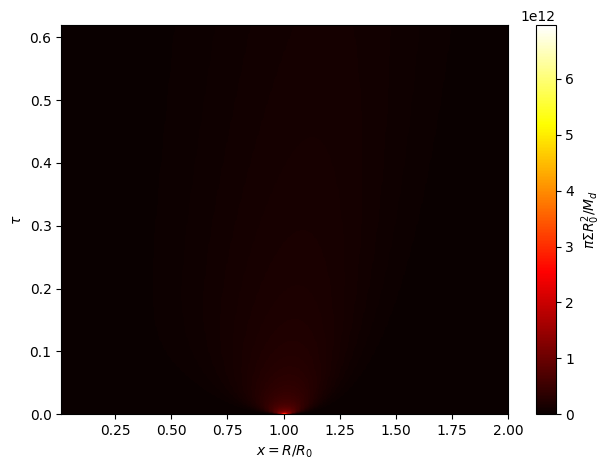

In [40]:
plot_2D_sigma(Sigma_array*np.pi*r_0**2/M_d,i=1,norm_bool=False)

In [41]:
def plot_1D_sigma(r_array, tau_array, Sigma_array):
    
    fig, ax = plt.subplots(figsize=(6,4.5))
    
    #tau_indices = [20, 140, 520, 2070, -4500, -1]
    #tau_indices = [200,1500, 5100, 20600, 38000, -17000]
    tau_indices = [250,1500, 5100, 20600, -17000]
    
    for i, (tau_idx, t) in enumerate(zip(tau_indices, tau_array[tau_indices])):
        tau_plot = tau_array[tau_idx]
        sig = Sigma_array[tau_idx, :]
        ax.plot(r_array/r_0, sig, label=round(tau_plot, 3))

    ax.set_xlabel(r"$x = R/R_0$",fontsize=13)
    ax.set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=13)
    ax.legend(title=r"$\tau$", fontsize='small', loc="best")

Testing for $\beta = -2$.

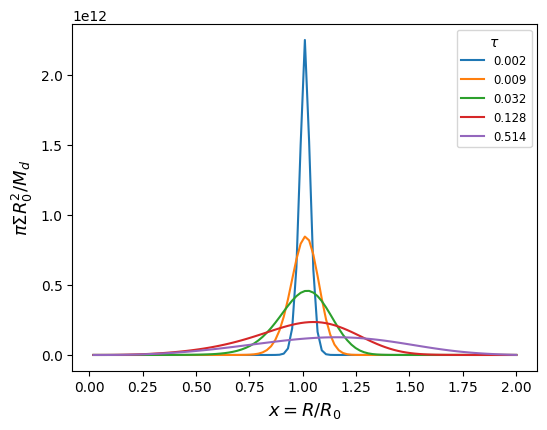

In [43]:
Sigma_array = density_dist_numerical(sigma=Sigma_zeroes, r_array=r_array, dt=dt, dr=dr, nu_0=nu_0, r_0=r_0, beta = -2)
plot_1D_sigma(r_array, tau_array, Sigma_array*np.pi*r_0**2/M_d)

In [45]:
def plot_1D_sigma(r_array, tau_array, Sigma_array, marker, n):
    
    #tau_indices = [20, 140, 520, 2070, -4500, -1]
    #tau_indices = [210,1500, 5100, 20600, 38000, -17000]
    tau_indices = [1500, 5100, 20600, -17000]
    color_list = ["tab:orange","tab:green","tab:red","tab:purple"]
    for i, (tau_idx, t) in enumerate(zip(tau_indices, tau_array[tau_indices])):
        tau_plot = tau_array[tau_idx]
        sig = Sigma_array[tau_idx, :]
        ax[n].plot(r_array/r_0, sig, ls=marker, color=color_list[i])

    ax[n].set_xlabel(r"$x = R/R_0$",fontsize=13)
    ax[n].set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=13)

$\beta$ ranging from -2 to 2.

Plot saved as part1_2b.pdf


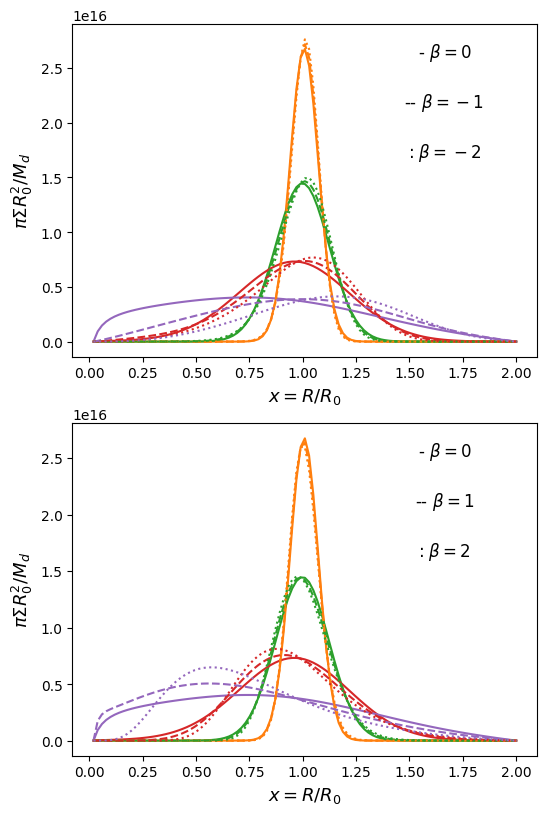

In [46]:
marker = ["-","--",":"]
fig, ax = plt.subplots(2,1,figsize=(6,9.5))

for n in range(2):
    if n == 0: beta_list = [0,-1,-2]
    elif n == 1: beta_list = [0,1,2]
        
    for i,beta in enumerate(beta_list):
        Sigma_array = density_dist_numerical(sigma=Sigma_zeroes, r_array=r_array, dt=dt, dr=dr, nu_0=nu_0, r_0=r_0, beta = beta)
        plot_1D_sigma(r_array, tau_array, Sigma_array, marker[i], n)
        ax[n].text(0.8, 0.95 - (i * 0.15), rf"{marker[i]} $\beta = {beta}$", 
                 fontsize=12, color='black',transform=ax[n].transAxes, ha='center', va='top')
fig.savefig("part1_2b.pdf")
print("Plot saved as part1_2b.pdf")

$\beta = 0$ or $\beta = 7$.

In [47]:
def plot_1D_sigma(r_array, tau_array, Sigma_array, marker):
    
    tau_indices = [1500, 5100, 20600, -17000]
    color_list = ["tab:orange","tab:green","tab:red","tab:purple"]
    for i, (tau_idx, t) in enumerate(zip(tau_indices, tau_array[tau_indices])):
        tau_plot = tau_array[tau_idx]
        sig = Sigma_array[tau_idx, :]
        ax.plot(r_array/r_0, sig, ls=marker, color=color_list[i])

    ax.set_xlabel(r"$x = R/R_0$",fontsize=13)
    ax.set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=13)

Sum of beta = 0:  2.5076123732429217e+22
Sum of beta = 7:  2.943869168103769e+22
Plot saved as part1_2b_7.pdf


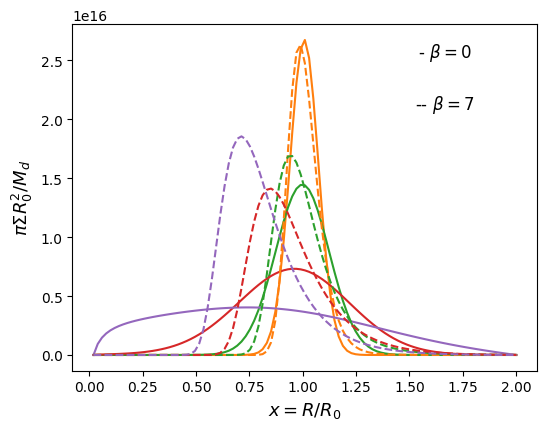

In [48]:
marker = ["-","--",":"]
fig, ax = plt.subplots(figsize=(6,4.5))
beta_list = [0,7]
    
for i,beta in enumerate(beta_list):
    Sigma_array = density_dist_numerical(sigma=Sigma_zeroes, r_array=r_array, dt=dt, dr=dr, nu_0=nu_0, r_0=r_0, beta = beta)
    print(f"Sum of beta = {beta}: ", np.sum(Sigma_array))
    plot_1D_sigma(r_array, tau_array, Sigma_array, marker[i])
    ax.text(0.8, 0.95 - (i * 0.15), rf"{marker[i]} $\beta = {beta}$", 
             fontsize=12, color='black',transform=ax.transAxes, ha='center', va='top')
fig.savefig("part1_2b_7.pdf")
print("Plot saved as part1_2b_7.pdf")

Changing the initial position of the material ring, $r_0$.

In [85]:
def plot_1D_sigma(r_array, tau_array, Sigma_array, n):
    
    tau_indices = [1500, 5100, 20600, -17000]
    color_list = ["tab:orange","tab:green","tab:red","tab:purple"]
    for i, (tau_idx, t) in enumerate(zip(tau_indices, tau_array[tau_indices])):
        tau_plot = tau_array[tau_idx]
        sig = Sigma_array[tau_idx, :]
        ax[n].plot(r_array/r_0, sig, color=color_list[i])

    ax[n].set_xlabel(r"$x = R/R_0$",fontsize=13)
    ax[n].set_ylabel(r"$\pi \Sigma R_0^2/M_d$",fontsize=13)

Plot saved as part1_2b_extra.pdf


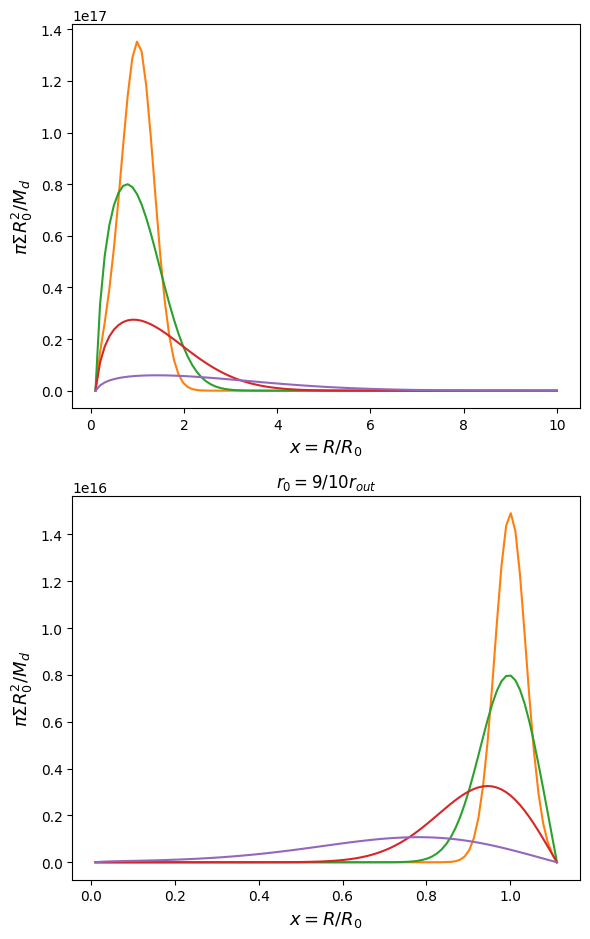

In [88]:
marker = ["-","--",":"]
fig, ax = plt.subplots(2,1,figsize=(6,9.5))
r_0_list = [1,9]

for i,fraction in enumerate(r_0_list):
    K = int(fraction*Nr/10)
    r_out = Nr*dr
    r_0 = K*dr
    tau_array = 12*nu_0 * t_array / r_0**2
    Sigma_array = density_dist_numerical(sigma=Sigma_zeroes, r_array=r_array, dt=dt, dr=dr, nu_0=nu_0, r_0=r_0, beta = 0)
    plot_1D_sigma(r_array, tau_array, Sigma_array, i)
    string = "r_{out}"
    plt.title(rf"$r_0 = {fraction}/10 {string}$")
fig.tight_layout()
fig.savefig("part1_2b_extra.pdf")
print("Plot saved as part1_2b_extra.pdf")

## Part II

1. Take a steady thin disk, optically thick, with a density distribution as found in Part I and with the system presenting the following characteristics:
   
   $M_\star= 1 M_\odot$; $R_\star = 2 R_\odot$; $T_\mathrm{eff}=4500$ K; $d_\star = 140$ parsec; Inclination $I=60º$; $V \sin I = 10$ km/s

In [3]:
c =  299792458 #m/s velocity of light
k_B = 1.346*10**(-23) #J/K Boltzmann constant
h = 6.62607015*10**(-34) #J * s  Planck constant
sigma = 5.6697 * 10**(-8) #W/m^2 K^4 Stefan-Boltzmann constant
G = 6.6743 * 10**-11 #m^3 kg^-1 s^-2 Gravitational constant
m_H = 1.6735575 * 10**(-27) #kg

In [4]:
#declaring solar constants
M_solar = 1.99 * 10**(30)  #kg
R_solar = 6.96 * 10**(8) #m

M_star = 1 * M_solar #kg
R_star = 2 * R_solar #m
Teff = 4500 #K
d_star = 140 * 3.08567758 * 10**(16) #pc to m
Inclination = 60 *0.0174532925 #degrees to radian
VsinI = 10 *10**3 #km/s to m/s

mu = 0.615 #mean molecular weight
M_dot = 10**(-7) * M_solar / (365*24*3600) #M_solar / yr to kg/s

In [5]:
Nr = 1000
r_in = R_star; r_out = 200 * R_star

r_array = np.linspace(r_in, r_out, Nr)
d_r = r_array[1]-r_array[0]

lambda_list = np.linspace(100e-10, 100000*1e-10, Nr)
d_lambda = lambda_list[1]-lambda_list[0]

(a) Estimate the total Spectral Emission Distribution (SED), i.e. $\lambda F_\lambda$, of the system and the emission from each component for a mass accretion rate $\dot M = 10^{-7} M_\odot$ yr$^{-1}$. The components you should consider are:
   
   i) The stellar emission (assume blackbody emission);

   ii) The disk emission due to the viscosity;

   iii) The disk emission caused by stellar irradiation;

   iv) The boundary layer emission.

In [6]:
def planck_func_lambda(T,lambda_list):
    return 2*h*c**2 / lambda_list**5 * 1/(np.exp(h*c/(lambda_list*k_B*T)) -1)

i) The stellar emission (assume blackbody emission);

Assume the stellar radiation is a blackbody emission at temperature Teff:

$$F_\star^\nu = \pi B_\nu (T_\mathrm{eff})$$

$$F_\mathrm{obs}^\nu =  F_\star^\nu \left(\frac{R_\star}{d}\right)^2$$

In [7]:
def get_F_obs_i(Teff,lambda_list,R_star,d_star):
    F_star = np.pi * planck_func_lambda(Teff,lambda_list)
    F_obs_i = F_star * (R_star / d_star)**2
    return F_obs_i

In [8]:
F_obs_i = get_F_obs_i(Teff,lambda_list,R_star,d_star)

ii) The disk emission due to the viscosity;

$$F_\lambda = \frac{2\pi \cos(i)}{d^2} \int_{r_{in}}^{r_{out}} B_\lambda (T_d(r)) rdr $$

where 

$$ T_d(r) = \left[\frac{3GM_\star \dot M}{8 \pi r^3 \sigma} \left[1- \left(\frac{R_\star}{r}\right)^{1/2}\right]\right]^{1/4}  $$

In [31]:
# Define the function for temperature profile T_d
def T_d(r,M_star,M_dot,R_star):
    return (3 * G * M_star * M_dot / (8 * np.pi * r**3 * sigma) * (1 - (R_star / r)**0.5))**0.25

def get_F_obs_ii(lambda_list,R_star,d_star,r_array,M_star,M_dot):
    F_obs_ii = np.zeros_like(lambda_list)

    for i, lambda_val in enumerate(lambda_list):
        # Compute the temperature profile at each radius
        T_d_values = T_d(r_array,M_star,M_dot,R_star)
        # Compute the integrand values for each radius
        integrand_values = planck_func_lambda(T_d_values, lambda_val) * r_array
        #integral = np.sum(integrand_values*d_r)
        # Compute the integral using Simpson's rule
        integral = simps(integrand_values, x=r_array)
        # Compute the flux for the given lambda_val
        F_obs_ii[i] = 2 * np.pi * np.cos(Inclination) / d_star**2 * integral

    return F_obs_ii

In [32]:
F_obs_ii =  get_F_obs_ii(lambda_list,R_star,d_star,r_array,M_star,M_dot)

C:\Users\telmo\AppData\Local\Temp\ipykernel_27056\1884822550.py:2: RuntimeWarning: divide by zero encountered in divide
  return 2*h*c**2 / lambda_list**5 * 1/(np.exp(h*c/(lambda_list*k_B*T)) -1)
C:\Users\telmo\AppData\Local\Temp\ipykernel_27056\1884822550.py:2: RuntimeWarning: overflow encountered in exp
  return 2*h*c**2 / lambda_list**5 * 1/(np.exp(h*c/(lambda_list*k_B*T)) -1)


iii) The disk emission by stellar irradiation;

The irradiation from the star at a distance $r$ is
$$F_\mathrm{irr}^{\lambda} (r) = B_\lambda (T_\mathrm{eff}) \{\arcsin(\frac{R_\star}{r}) - \frac{R_\star}{r} [1-(\frac{R_\star}{r})^2]^{1/2}\}  $$

The total flux that heats the disk at a distance $r$ is
$$F_\mathrm{irr}(r) = \int F_{\mathrm{irr}}^\lambda (r) d\lambda = \sigma T^4_\mathrm{irr} (r)  $$

Then
$$F_\lambda = \frac{2 \pi \cos(i)}{d^2} \int_{r_{in}}^{r_{out}} B_\lambda (T_\mathrm{irr} (r)) r dr$$

In [33]:
def get_F_irr(r_array, Teff, R_star):
    F_irr = np.zeros(Nr)
    for j, r in enumerate(r_array):
        F_irr_lambda = planck_func_lambda(Teff, lambda_list) * (np.arcsin(R_star / r) - (R_star / r) * (1 - (R_star / r)**2)**(1/2))
        F_irr[j] = np.sum(F_irr_lambda)*d_lambda
    return F_irr

def get_T_irr(r_array, Teff, R_star):
    return (get_F_irr(r_array, Teff, R_star)/sigma)**(1/4)

def get_F_obs_iii(lambda_list,R_star,d_star,r_array,M_star):
    F_obs_iii = np.zeros_like(lambda_list)
    
    for i, lambda_val in enumerate(lambda_list):
        # Compute the temperature profile at each radius
        T_irr_values = get_T_irr(r_array, Teff, R_star)
    
        # Compute the integrand values for each radius
        integrand_values = planck_func_lambda(T_irr_values, lambda_val) * r_array
        integral = simps(integrand_values, x=r_array)
        #integral = np.sum(integrand_values*d_r)
    
        # Compute the flux for the given lambda_val
        F_obs_iii[i] = 2 * np.pi * np.cos(Inclination) / d_star**2 * integral

    return F_obs_iii

In [34]:
F_obs_iii = get_F_obs_iii(lambda_list,R_star,d_star,r_array,M_star)

C:\Users\telmo\AppData\Local\Temp\ipykernel_27056\1884822550.py:2: RuntimeWarning: overflow encountered in exp
  return 2*h*c**2 / lambda_list**5 * 1/(np.exp(h*c/(lambda_list*k_B*T)) -1)


iv) The boundary layer.

Boundary layer temperature’s determination:

$$ T_\mathrm{BL}^4 = T_\mathrm{in}^4 \frac{R_\star}{3H}, $$ where $ T_\mathrm{in} = \left( \frac{3G M_\star \dot M}{8 \pi \sigma R_\star^3}\right)^{1/4} $.

The thickness of the disk near the surface of the star is given by $H^2 = \frac{R_\star^3}{G M_\star}  c_s^2$.

We can take the sound speed in the boundary layer similar to the value in the inner part of the disk $c^2_s \sim \frac{k T_\mathrm{in}}{\mu m_H}$. We can assume the matter is completely ionized in the inner part of the disk, $\mu \sim 0.615$, so

$$T_\mathrm{BL} = T_\mathrm{in} \left(\frac{G M_\star \mu m_H}{9 R_\star k T_\mathrm{in}} \right)^{1/8}. $$

We know that $F_\text{obs}^\nu = \frac{\pi R_\star^2 \cos(i)}{d^2} B_\nu (T_\text{BL})$ and 

$$L_\text{BL} = 2 \times 2 \pi R_star H \sigma T_\text{BL}^4 = \frac{\dot M M_\star G}{2 R_\star} \left[1-\frac{\Omega_\star}{\Omega_k}\right]^2.$$

$L_\text{BL}$ varies with occultation of the Boundary layer by the star, by $L_\text{BL}/2 \times f$, with $f<1$, but we neglect the occultation, so $f\sim1$. 

If $T_\text{BL}$ and $H$ are known:

$$F_\text{obs}^\nu = \frac{2\pi\cos(i)}{d^2} \int_{R_\star}^{R_\star + H} B_\nu (T_\text{BL}) r dr = \frac{2 \pi R_\star H}{d^2} B_\nu (T_\text{BL}) \cos(i)$$

In [22]:
def get_F_obs_iv(lambda_list,R_star,d_star,r_array,M_star,M_dot):
    T_in = (3 * G * M_star * M_dot / (8 * np.pi * sigma * R_star**3))**0.25 #temperature inner part of the disk
    T_BL = T_in * ( (G*M_star*mu*m_H) / (9*R_star*k_B*T_in) )**(1/8) #boundary layer temperature
    
    c_s = (k_B*T_in/(mu*m_H))**0.5 #sound velocity
    H = R_star**(3/2)/(G*M_star)**(1/2) * c_s #thickness of disk near surface of the star
    
    B_lambda = planck_func_lambda(T_BL,lambda_list) #Planck function of T_BL
    
    F_obs_iv = 2*np.pi*R_star*H/(d_star**2)*B_lambda*np.cos(Inclination)

    return F_obs_iv

In [23]:
F_obs_iv = get_F_obs_iv(lambda_list,R_star,d_star,r_array,M_star,M_dot)

Now a plot with every flux:

In [24]:
def plot_all_fluxes(lambda_list, 
                    fluxes = {"F_obs_i":[F_obs_i,"Stellar emission","g"], "F_obs_ii":[F_obs_ii,"Disk emission due to viscosity","r"], 
                              "F_obs_iii":[F_obs_iii, "Disk emission caused by stellar irradiation","y"], 
                              "F_obs_iv":[F_obs_iv,"Boundary layer emission","b"]}, 
                    values_title = {"M_star":1,"R_star":2,"M_dot":10**(-7)}):
    
    total_flux = np.sum([fluxes[key][0] for key in fluxes.keys()],axis=0)
    
    #plt.figure(1)
    x = lambda_list*10**10 #angstrom
    for f in fluxes.keys():
        plt.plot(x, fluxes[f][0]*lambda_list, label=fluxes[f][1],color=fluxes[f][2])
    plt.plot(x, total_flux*lambda_list, label="Total Flux",color="k")
    
    plt.xlabel(r"$\lambda$ [$\AA$]"); plt.ylabel(r"$\lambda F_\lambda$")
    plt.title(f"$M_\\star = {values_title['M_star']} M_\\odot$; $R_\\star = {values_title['R_star']} R_\\odot$; $\\dot M = {values_title['M_dot']} M_\\odot$/yr; Teff = {values_title['Teff']} K")
    plt.legend()

In [35]:
plot_all_fluxes(lambda_list, 
                    fluxes = {"F_obs_i":[F_obs_i,"Stellar emission","g"], "F_obs_ii":[F_obs_ii,"Disk emission due to viscosity","r"], 
                              "F_obs_iii":[F_obs_iii, "Disk emission caused by stellar irradiation","y"], 
                              "F_obs_iv":[F_obs_iv,"Boundary layer emission","b"]}, 
                    values_title = {"M_star":1,"R_star":2,"M_dot":10**(-7),"Teff":4500})

plt.tight_layout()
plt.savefig("part2_a.pdf")

# Show a confirmation message
print("Plot saved as part2_a.pdf")
plt.close()

Plot saved as part2_a.pdf


In [36]:
IFrame("part2_a.pdf", width=800, height=400)

(b) Check what happen to the emission components when you change the stellar mass $[M_\star = 0.5$ and $2 M_\odot]$, the efective temperature $[T_\mathrm{eff} = 4000$ and 5000 K] and the mass accretion rate $[10^{-8}$ and $10^{-6} M_\odot$ yr$^{-1}]$.

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(9, 14.5)) 

################################################

M_star_list = [1*M_solar, 0.5*M_solar, 2*M_solar]
M_dot = 10**(-7) * M_solar / (365*24*3600)
Teff = 4500
M_star_label = [1, 0.5, 2]

marker = ["-","--",":"]
for m, M_star in enumerate(M_star_list):
            
    F_obs_i = get_F_obs_i(Teff,lambda_list,R_star,d_star)
    F_obs_ii =  get_F_obs_ii(lambda_list,R_star,d_star,r_array,M_star,M_dot)
    F_obs_iii = get_F_obs_iii(lambda_list,R_star,d_star,r_array,M_star)
    F_obs_iv = get_F_obs_iv(lambda_list,R_star,d_star,r_array,M_star,M_dot)

    total_flux = F_obs_i + F_obs_ii + F_obs_iii + F_obs_iv
    
    x = lambda_list*10**10 #m to angstrom

    fluxes = {"F_obs_i":[F_obs_i,"Stellar emission","g"], "F_obs_ii":[F_obs_ii,"Disk emission due to viscosity","r"], 
                              "F_obs_iii":[F_obs_iii, "Disk emission caused by stellar irradiation","y"], 
                              "F_obs_iv":[F_obs_iv,"Boundary layer emission","b"]}
    
    for f in fluxes.keys():
        ax1.plot(x, fluxes[f][0]*lambda_list,color=fluxes[f][2],ls=marker[m])
    ax1.plot(x, total_flux*lambda_list,color="k",ls=marker[m])
    ax1.text(0.8, 0.95 - (m * 0.15), rf"'{marker[m]}': $M_\star = {M_star_label[m]}$ $M_\odot$", 
            fontsize=13, color='black',transform=ax1.transAxes, ha='center', va='top')

ax1.set_xlabel(r"$\lambda$ [$\AA$]",fontsize=13); 
ax1.set_ylabel(r"$\lambda F_\lambda$",fontsize=13)
ax1.set_title(r"Varying $M_\star$, with $T_\mathrm{eff} = 4500 \mathrm{K}; R_\star = 2 R_\odot; \dot M = 10^{-7} M_\odot/yr$",fontsize=13)

################################################

M_star = 1*M_solar
M_dot_list = [10**(-7) * M_solar / (365*24*3600), 10**(-8) * M_solar / (365*24*3600), 10**(-6) * M_solar / (365*24*3600)]
Teff = 4500
M_dot_label = [10**(-7), 10**(-8), 10**(-6)]

marker = ["-","--",":"]
for m_d, M_dot in enumerate(M_dot_list):
            
    F_obs_i = get_F_obs_i(Teff,lambda_list,R_star,d_star)
    F_obs_ii =  get_F_obs_ii(lambda_list,R_star,d_star,r_array,M_star,M_dot)
    F_obs_iii = get_F_obs_iii(lambda_list,R_star,d_star,r_array,M_star)
    F_obs_iv = get_F_obs_iv(lambda_list,R_star,d_star,r_array,M_star,M_dot)

    total_flux = F_obs_i + F_obs_ii + F_obs_iii + F_obs_iv
    
    x = lambda_list*10**10 #m to angstrom

    fluxes = {"F_obs_i":[F_obs_i,"Stellar emission","g"], "F_obs_ii":[F_obs_ii,"Disk emission due to viscosity","r"], 
                              "F_obs_iii":[F_obs_iii, "Disk emission caused by stellar irradiation","y"], 
                              "F_obs_iv":[F_obs_iv,"Boundary layer emission","b"]}
    
    for f in fluxes.keys():
        ax2.plot(x, fluxes[f][0]*lambda_list, color=fluxes[f][2],ls=marker[m_d])
    ax2.plot(x, total_flux*lambda_list, color="k",ls=marker[m_d])

    ax2.text(0.8, 0.95 - (m_d * 0.15), rf"{marker[m_d]} $\dot M = {M_dot_label[m_d]}$ $M_\odot$/yr", 
            fontsize=13, color='black',transform=ax2.transAxes, ha='center', va='top')

ax2.set_xlabel(r"$\lambda$ [$\AA$]",fontsize=13) 
ax2.set_ylabel(r"$\lambda F_\lambda$",fontsize=13)
ax2.set_title(r"Varying $\dot M$, with Teff = 4500 K; $R_\star = 2 R_\odot; M_\star = 1 M_\odot$",fontsize=13)

################################################

M_star = 1*M_solar
M_dot = 10**(-7) * M_solar / (365*24*3600)
Teff_list = [4500,4000,5000]

marker = ["-","--",":"]
for t, Teff in enumerate(Teff_list):
            
    F_obs_i = get_F_obs_i(Teff,lambda_list,R_star,d_star)
    F_obs_ii =  get_F_obs_ii(lambda_list,R_star,d_star,r_array,M_star,M_dot)
    F_obs_iii = get_F_obs_iii(lambda_list,R_star,d_star,r_array,M_star)
    F_obs_iv = get_F_obs_iv(lambda_list,R_star,d_star,r_array,M_star,M_dot)

    total_flux = F_obs_i + F_obs_ii + F_obs_iii + F_obs_iv
    
    x = lambda_list*10**10 #m to angstrom

    fluxes = {"F_obs_i":[F_obs_i,"Stellar emission","g"], "F_obs_ii":[F_obs_ii,"Disk emission due to viscosity","r"], 
                              "F_obs_iii":[F_obs_iii, "Disk emission caused by stellar irradiation","y"], 
                              "F_obs_iv":[F_obs_iv,"Boundary layer emission","b"]}
    
    for f in fluxes.keys():
        ax3.plot(x, fluxes[f][0]*lambda_list,color=fluxes[f][2],ls=marker[t])
    ax3.plot(x, total_flux*lambda_list,color="k",ls=marker[t])
    ax3.text(0.8, 0.95 - (t * 0.15), rf"{marker[t]} $Teff = {Teff}$ K", 
             fontsize=13, color='black',transform=ax3.transAxes, ha='center', va='top')

ax3.set_xlabel(r"$\lambda$ [$\AA$]",fontsize=13)
ax3.set_ylabel(r"$\lambda F_\lambda$",fontsize=13)
ax3.set_title(r"Varying Teff, with $M_\star = 1 M_\odot; R_\star = 2 R_\odot; \dot M = 10^{-7} M_\odot/yr$",fontsize=13)

################################################

plt.tight_layout()
plt.savefig("part2_b.pdf")

# Show a confirmation message
print("Plot saved as part2_b.pdf")
plt.close()

C:\Users\telmo\AppData\Local\Temp\ipykernel_27056\1884822550.py:2: RuntimeWarning: divide by zero encountered in divide
  return 2*h*c**2 / lambda_list**5 * 1/(np.exp(h*c/(lambda_list*k_B*T)) -1)
C:\Users\telmo\AppData\Local\Temp\ipykernel_27056\1884822550.py:2: RuntimeWarning: overflow encountered in exp
  return 2*h*c**2 / lambda_list**5 * 1/(np.exp(h*c/(lambda_list*k_B*T)) -1)


Plot saved as part2_b.pdf


In [38]:
IFrame("part2_b.pdf", width=800, height=400)